In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, confusion_matrix, f1_score, accuracy_score, recall_score, classification_report, roc_auc_score, auc, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



In [2]:
label_dic = {0: 'Still', 1: 'Walking', 2: 'Run', 3: 'Bike', 4: 'Car', 5: 'Bus', 6: 'Train', 7: 'Subway'}

def evaluate(y_true, y_pred, class_names=list(label_dic.values())):
    #各种评价指标
    print('Macro F1 Score: {}\n'.format(
        f1_score(y_true, y_pred, average='macro')))
    print(classification_report(y_true, y_pred, target_names=class_names))

    #绘制混淆矩阵热力图
    conf = confusion_matrix(y_true, y_pred)
    print(conf)
    plt.figure(figsize=(9, 8))
    sns.heatmap(conf,
                cmap=plt.cm.Blues,
                annot=True,
                fmt="d",
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predict label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

In [3]:
def rename_columns(dataframe,common_part):
    """去掉给定数据框中给定的列的公共部分

    Args:
        dataframe (str): 数据集
        common_part (str): 公共部分
    """
    dataframe.columns=[col.replace(common_part, '') for col in dataframe.columns]

In [4]:
def matching_columns(dataframe,common_part):
    """匹配给定数据框中具有给定公共部分的所有的列

    Args:
        dataframe (str): 数据集
        common_part (str): 公共部分
    """
    matching_columns = [col for col in dataframe.columns if common_part in col]
    print('找到的列的数量为： {}'.format(len(matching_columns)))
    return matching_columns

# 读取数据

## 全数据

### 全数据训练集

In [5]:
data1_1 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_acc.pkl')
data1_2 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_gps_and_loc.pkl')
data1_3 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_gyr.pkl')
data1_4 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_mag.pkl')
data1_5 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_speed.pkl')
data1_6 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_distance.pkl')
label1 = pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/train/label.pkl')

X1=pd.concat([data1_1, data1_2,data1_3,data1_4,data1_5,data1_6],axis=1)
rename_columns(X1,'bag_')
y1=label1['label']
X1.head(5)

,acc_Acc_x,acc_Acc_y,acc_Acc_z,acc_L2,Mean_acc_Acc_x,Mean_acc_Acc_y,Mean_acc_Acc_z,Mean_acc_L2,Var_acc_Acc_x,Var_acc_Acc_y,...,vertical_speed_psd_value3,vertical_speed_psd_index1,vertical_speed_psd_index2,vertical_speed_psd_index3,railway_distances,living_street_distances,busway_distances,motorway_distances,residential_distances,pedestrian_distances
0,9.299079,-0.536301,-3.916914,10.104588,8.884207,-1.796277,1.521092,10.590318,12.278721,6.535145,...,0.000943,16.0,12.0,4.0,80097.637,80830.154,112328.404,93553.174,78969.215,80841.495
1,9.293343,-0.536301,-3.924570,10.102282,8.783531,-1.702502,1.617708,10.487590,12.183634,6.589913,...,0.000943,16.0,12.0,4.0,80096.824,80829.342,112327.590,93552.396,78968.401,80840.681
2,9.306733,-0.524802,-3.909260,10.108067,8.611817,-1.653310,1.957650,10.563665,12.734154,6.454772,...,0.000943,16.0,12.0,4.0,80096.068,80828.587,112326.834,93551.669,78967.645,80839.924
3,9.299079,-0.528867,-3.914771,10.103366,8.487783,-1.546218,2.174076,10.556660,12.843903,6.631528,...,0.000943,16.0,12.0,4.0,80095.403,80827.923,112326.168,93551.029,78966.979,80839.259
4,9.291411,-0.526724,-3.930341,10.102244,8.480158,-1.472115,2.297583,10.553625,12.456671,6.617274,...,0.000943,16.0,12.0,4.0,80094.737,80827.259,112325.502,93550.389,78966.313,80838.593


In [6]:
data1_1 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_acc.pkl')
data1_2 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_gps_and_loc.pkl')
data1_3 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_gyr.pkl')
data1_4 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_mag.pkl')
data1_5 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_speed.pkl')
data1_6 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_distance.pkl')
label1 = pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/train/label.pkl')

X2=pd.concat([data1_1, data1_2,data1_3,data1_4,data1_5,data1_6],axis=1)
rename_columns(X2,'hand_')
y2=label1['label']
X2.head(5)

,acc_Acc_x,acc_Acc_y,acc_Acc_z,acc_L2,Mean_acc_Acc_x,Mean_acc_Acc_y,Mean_acc_Acc_z,Mean_acc_L2,Var_acc_Acc_x,Var_acc_Acc_y,...,vertical_speed_psd_value3,vertical_speed_psd_index1,vertical_speed_psd_index2,vertical_speed_psd_index3,railway_distances,living_street_distances,busway_distances,motorway_distances,residential_distances,pedestrian_distances
0,3.859912,1.117648,8.659125,9.546125,0.230743,-1.524995,-6.658819,10.966902,9.828123,12.248150,...,0.004237,0.0,4.0,8.0,80103.467,80832.968,112332.606,93565.551,78973.559,80846.224
1,4.233104,0.976834,8.528031,9.570825,0.331507,-1.665464,-6.620865,10.894120,9.815271,12.451551,...,0.004237,0.0,4.0,8.0,80105.525,80835.058,112334.684,93567.450,78975.636,80848.297
2,4.654122,1.249928,8.504205,9.774696,0.312765,-1.619069,-6.479663,10.620152,9.509890,12.118767,...,0.004237,0.0,4.0,8.0,80107.647,80837.198,112336.820,93569.442,78977.770,80850.428
3,2.439756,-1.369483,8.789167,9.223738,0.237518,-1.823200,-6.507273,10.642702,9.399555,13.115153,...,0.004237,0.0,4.0,8.0,80109.770,80839.339,112338.955,93571.433,78979.905,80852.560
4,-3.567203,-6.689622,-2.251960,7.908685,0.225795,-1.738052,-6.802606,10.817448,9.119392,12.964230,...,0.004237,0.0,4.0,8.0,80113.756,80843.319,112342.944,93575.265,78983.894,80856.550


In [7]:
data1_1 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_acc.pkl')
data1_2 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_gps_and_loc.pkl')
data1_3 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_gyr.pkl')
data1_4 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_mag.pkl')
data1_5 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_speed.pkl')
data1_6 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_distance.pkl')
label1 = pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/train/label.pkl')

X3=pd.concat([data1_1, data1_2,data1_3,data1_4,data1_5,data1_6],axis=1)
rename_columns(X3,'hips_')
y3=label1['label']
X3.head(5)

,acc_Acc_x,acc_Acc_y,acc_Acc_z,acc_L2,Mean_acc_Acc_x,Mean_acc_Acc_y,Mean_acc_Acc_z,Mean_acc_L2,Var_acc_Acc_x,Var_acc_Acc_y,...,vertical_speed_psd_value3,vertical_speed_psd_index1,vertical_speed_psd_index2,vertical_speed_psd_index3,railway_distances,living_street_distances,busway_distances,motorway_distances,residential_distances,pedestrian_distances
0,-0.355438,-9.969456,-0.093576,9.976229,-0.392430,-10.978878,-0.995148,12.498435,7.882931,11.052984,...,0.000943,16.0,12.0,4.0,80097.637,80830.154,112328.404,93553.174,78969.215,80841.495
1,-0.275554,-9.988609,0.104258,9.992953,-0.384695,-10.731334,-1.130331,12.293690,7.622021,12.584175,...,0.000943,16.0,12.0,4.0,80096.824,80829.342,112327.590,93552.396,78968.401,80840.681
2,-0.137359,-9.925950,0.236137,9.929709,-0.382635,-10.718371,-1.413570,12.362852,7.376285,12.183611,...,0.000943,16.0,12.0,4.0,80096.068,80828.587,112326.834,93551.669,78967.645,80839.924
3,0.034332,-10.087738,0.488022,10.099594,-0.429510,-10.623510,-1.374935,12.225513,7.218286,12.099828,...,0.000943,16.0,12.0,4.0,80095.403,80827.923,112326.168,93551.029,78966.979,80839.259
4,1.417306,-9.909104,-0.199062,10.011929,-0.521914,-10.571062,-1.453014,12.170379,7.289857,11.826692,...,0.000943,16.0,12.0,4.0,80094.737,80827.259,112325.502,93550.389,78966.313,80838.593


In [8]:
data1_1 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_acc.pkl')
data1_2 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_gps_and_loc.pkl')
data1_3 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_gyr.pkl')
data1_4 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_mag.pkl')
data1_5 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_speed.pkl')
data1_6 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_distance.pkl')
label1 = pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/train/label.pkl')

X4=pd.concat([data1_1, data1_2,data1_3,data1_4,data1_5,data1_6],axis=1)
rename_columns(X4,'torso_')
y4=label1['label']
X4.head(5)

,acc_Acc_x,acc_Acc_y,acc_Acc_z,acc_L2,Mean_acc_Acc_x,Mean_acc_Acc_y,Mean_acc_Acc_z,Mean_acc_L2,Var_acc_Acc_x,Var_acc_Acc_y,...,vertical_speed_psd_value3,vertical_speed_psd_index1,vertical_speed_psd_index2,vertical_speed_psd_index3,railway_distances,living_street_distances,busway_distances,motorway_distances,residential_distances,pedestrian_distances
0,0.718613,-9.892841,0.881066,9.957961,1.538945,-8.774836,-2.885599,10.229248,4.376540,9.898680,...,0.000943,16.0,12.0,4.0,80097.637,80830.154,112328.404,93553.174,78969.215,80841.495
1,0.631726,-9.892154,0.845507,9.948300,1.537268,-8.658267,-2.939489,10.126476,4.230742,9.989961,...,0.000943,16.0,12.0,4.0,80096.824,80829.342,112327.590,93552.396,78968.401,80840.681
2,0.346629,-9.832772,0.709802,9.864450,1.451794,-8.535109,-3.176654,10.172500,4.328054,10.153074,...,0.000943,16.0,12.0,4.0,80096.068,80828.587,112326.834,93551.669,78967.645,80839.924
3,-0.959425,-9.615812,-1.397516,9.764087,1.439437,-8.458827,-3.353097,10.193823,4.197841,10.027815,...,0.000943,16.0,12.0,4.0,80095.403,80827.923,112326.168,93551.029,78966.979,80839.259
4,0.583314,-7.749900,-3.771695,8.638686,1.396456,-8.413592,-3.332570,10.112025,4.133444,9.793514,...,0.000943,16.0,12.0,4.0,80094.737,80827.259,112325.502,93550.389,78966.313,80838.593


### 全数据测试集

In [9]:
data2_1 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/bag_acc.pkl')
data2_2 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/bag_gps_and_loc.pkl')
data2_3 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/bag_gyr.pkl')
data2_4 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/bag_mag.pkl')
data2_5 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/bag_speed.pkl')
data2_6 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/bag_distance.pkl')
label2 = pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/validate/label.pkl')

X1_val=pd.concat([data2_1, data2_2,data2_3,data2_4,data2_5,data2_6],axis=1)
rename_columns(X1_val,'bag_')
y1_val=label2['label']
X1_val.head(5)

,acc_Acc_x,acc_Acc_y,acc_Acc_z,acc_L2,Mean_acc_Acc_x,Mean_acc_Acc_y,Mean_acc_Acc_z,Mean_acc_L2,Var_acc_Acc_x,Var_acc_Acc_y,...,vertical_speed_psd_value3,vertical_speed_psd_index1,vertical_speed_psd_index2,vertical_speed_psd_index3,railway_distances,living_street_distances,busway_distances,motorway_distances,residential_distances,pedestrian_distances
0,8.233006,1.399070,-0.712268,8.381355,10.853302,2.505543,-0.374201,13.246590,107.930923,41.809493,...,0.000094,4.0,0.0,8.0,83545.640,84443.931,115866.758,96481.149,82487.942,84354.745
1,9.530093,1.326214,-2.746821,10.006325,10.755901,2.535315,-0.470311,13.115583,104.627318,40.443321,...,0.000094,4.0,0.0,8.0,83543.798,84442.196,115864.967,96479.135,82486.135,84352.941
2,6.964802,0.956738,-1.583169,7.206264,10.602799,2.468546,-0.676898,12.993155,102.002327,39.281355,...,0.000094,4.0,0.0,8.0,83542.189,84440.669,115863.396,96477.403,82484.553,84351.359
3,9.177164,2.414216,-1.188278,9.563513,10.392398,2.522136,-0.723185,12.781755,100.275627,38.148583,...,0.000094,4.0,0.0,8.0,83540.933,84439.452,115862.157,96476.104,82483.308,84350.116
4,9.067113,0.996756,-3.465133,9.757726,10.304050,2.592136,-0.974922,12.783372,97.502355,37.159164,...,0.000094,4.0,0.0,8.0,83539.251,84437.840,115860.508,96474.331,82481.649,84348.458


In [10]:
data2_1 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_acc.pkl')
data2_2 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_gps_and_loc.pkl')
data2_3 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_gyr.pkl')
data2_4 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_mag.pkl')
data2_5 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_speed.pkl')
data2_6 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_distance.pkl')
label2 = pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/validate/label.pkl')

X2_val=pd.concat([data2_1, data2_2,data2_3,data2_4,data2_5,data2_6],axis=1)
rename_columns(X2_val,'hand_')
y2_val=label2['label']
X2_val.head(5)

,acc_Acc_x,acc_Acc_y,acc_Acc_z,acc_L2,Mean_acc_Acc_x,Mean_acc_Acc_y,Mean_acc_Acc_z,Mean_acc_L2,Var_acc_Acc_x,Var_acc_Acc_y,...,vertical_speed_psd_value3,vertical_speed_psd_index1,vertical_speed_psd_index2,vertical_speed_psd_index3,railway_distances,living_street_distances,busway_distances,motorway_distances,residential_distances,pedestrian_distances
0,-2.077102,-0.681738,7.905215,8.201923,7.258607,1.113912,2.269153,13.128045,138.508510,34.660442,...,0.000032,4.0,0.0,8.0,83531.867,84428.866,115852.333,96470.909,82473.708,84340.482
1,-1.235258,0.948044,11.653373,11.756945,6.983426,0.906878,2.302758,12.910391,136.239028,34.833860,...,0.000032,4.0,0.0,8.0,83530.403,84427.479,115850.905,96469.326,82472.268,84339.044
2,-0.604894,-0.209900,9.573598,9.594985,7.091807,0.933103,2.265562,12.839901,132.220107,33.732195,...,0.000032,4.0,0.0,8.0,83528.827,84425.940,115849.345,96467.728,82470.703,84337.480
3,-1.700441,-2.692610,9.062538,9.605792,6.877252,1.197963,2.233612,12.746238,129.607341,34.993057,...,0.000032,4.0,0.0,8.0,83527.124,84424.264,115847.653,96466.034,82469.008,84335.785
4,-1.776053,0.377002,9.437498,9.610560,6.693053,0.943349,2.313041,12.635006,126.833442,36.136828,...,0.000032,4.0,0.0,8.0,83524.974,84422.240,115845.562,96463.681,82466.899,84333.679


In [11]:
data2_1 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hips_acc.pkl')
data2_2 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hips_gps_and_loc.pkl')
data2_3 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hips_gyr.pkl')
data2_4 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hips_mag.pkl')
data2_5 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hips_speed.pkl')
data2_6 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hips_distance.pkl')
label2 = pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/validate/label.pkl')

X3_val=pd.concat([data2_1, data2_2,data2_3,data2_4,data2_5,data2_6],axis=1)
rename_columns(X3_val,'hips_')
y3_val=label2['label']
X3_val.head(5)

,acc_Acc_x,acc_Acc_y,acc_Acc_z,acc_L2,Mean_acc_Acc_x,Mean_acc_Acc_y,Mean_acc_Acc_z,Mean_acc_L2,Var_acc_Acc_x,Var_acc_Acc_y,...,vertical_speed_psd_value3,vertical_speed_psd_index1,vertical_speed_psd_index2,vertical_speed_psd_index3,railway_distances,living_street_distances,busway_distances,motorway_distances,residential_distances,pedestrian_distances
0,-7.967903,-0.154843,-2.029879,8.223859,-9.337522,-0.237563,-3.051831,10.469039,20.887581,0.956008,...,0.000044,4.0,0.0,8.0,83528.130,84425.634,115848.839,96466.159,82470.140,84336.925
1,-10.688116,-1.663484,-0.624595,10.834811,-9.504589,-0.293797,-2.946700,10.603991,21.056575,1.022169,...,0.000044,4.0,0.0,8.0,83526.932,84424.618,115847.729,96464.591,82469.004,84335.793
2,-8.608938,-0.404642,-2.858930,9.080255,-9.684817,-0.248056,-3.025647,10.780901,21.416767,1.056146,...,0.000044,4.0,0.0,8.0,83525.407,84423.280,115846.293,96462.694,82467.541,84334.334
3,-9.324481,0.559194,-2.656515,9.711628,-9.470320,-0.250006,-2.923650,10.534420,22.265794,1.023267,...,0.000044,4.0,0.0,8.0,83523.725,84421.790,115844.704,96460.638,82465.924,84332.721
4,-9.840344,-1.340753,-1.527734,10.048082,-9.649541,-0.273290,-2.878438,10.685177,22.683162,1.010691,...,0.000044,4.0,0.0,8.0,83522.402,84420.651,115843.469,96458.944,82464.662,84331.463


In [12]:
data2_1 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/torso_acc.pkl')
data2_2 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/torso_gps_and_loc.pkl')
data2_3 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/torso_gyr.pkl')
data2_4 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/torso_mag.pkl')
data2_5 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/torso_speed.pkl')
data2_6 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/torso_distance.pkl')
label2 = pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/validate/label.pkl')

X4_val=pd.concat([data2_1, data2_2,data2_3,data2_4,data2_5,data2_6],axis=1)
rename_columns(X4_val,'torso_')
y4_val=label2['label']
X4_val.head(5)

,acc_Acc_x,acc_Acc_y,acc_Acc_z,acc_L2,Mean_acc_Acc_x,Mean_acc_Acc_y,Mean_acc_Acc_z,Mean_acc_L2,Var_acc_Acc_x,Var_acc_Acc_y,...,vertical_speed_psd_value3,vertical_speed_psd_index1,vertical_speed_psd_index2,vertical_speed_psd_index3,railway_distances,living_street_distances,busway_distances,motorway_distances,residential_distances,pedestrian_distances
0,6.742072,-5.356778,0.948104,8.663112,6.935520,-4.822833,-0.096606,10.054149,43.007647,29.218639,...,0.000009,4.0,0.0,16.0,83529.911,84428.224,115851.019,96466.002,82472.202,84339.005
1,11.444141,-6.740869,1.926105,13.420788,6.938346,-4.812646,-0.082278,9.999246,41.574307,28.247902,...,0.000009,4.0,0.0,16.0,83528.930,84427.355,115850.093,96464.804,82471.259,84338.064
2,9.861227,-4.286628,0.883054,10.788826,7.329510,-5.159037,0.162228,10.508340,45.129497,31.176245,...,0.000009,4.0,0.0,16.0,83527.945,84426.471,115849.156,96463.624,82470.308,84337.115
3,7.564426,-6.644486,1.165017,10.135433,7.134074,-5.010735,0.066737,10.284666,44.979653,30.927770,...,0.000009,4.0,0.0,16.0,83527.429,84426.014,115848.668,96462.994,82469.811,84336.620
4,8.495389,-4.901803,2.384323,10.093775,7.188325,-5.045314,0.104058,10.305266,43.716703,30.031220,...,0.000009,4.0,0.0,16.0,83526.890,84425.555,115848.167,96462.292,82469.299,84336.109


### 合并数据

In [13]:
X=pd.concat([X1,X2,X3,X4],axis=0)
y=pd.concat([y1,y2,y3,y4],axis=0)

X_val=pd.concat([X1_val,X2_val,X3_val,X4_val],axis=0)
y_val=pd.concat([y1_val,y2_val,y3_val,y4_val],axis=0)

le = LabelEncoder()
y = le.fit_transform(y)
y_val = le.fit_transform(y_val)
#查看标签转化结果
le.inverse_transform([0,1,2,3,4,5,6,7])

array([1, 2, 3, 4, 5, 6, 7, 8])

In [14]:
#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=648)

In [15]:
#打乱数据集顺序
X,y= shuffle(X,y,random_state=648)

# 第一项对比：训练集和测试集上的效果

## 第一项实验

### 主模型

第一个实验是将训练集按照8:2划分为训练集和测试集，观察训练集上的F1 score

In [22]:
model_XGB1 = xgb.XGBClassifier(learning_rate=0.01,
                                n_estimators=200,
                                gpu_id=0,
                                max_depth=8,
                                min_child_weight=1,
                                gamma=0,
                                colsample_bytree=0.85,
                                tree_method='gpu_hist')

In [23]:
model_XGB1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Macro F1 Score: 0.9640675757525736

              precision    recall  f1-score   support

       Still       0.96      0.97      0.96     97686
     Walking       0.99      0.99      0.99     97873
         Run       1.00      0.99      1.00     33614
        Bike       0.98      0.99      0.98     94330
         Car       0.93      0.91      0.92    127080
         Bus       0.89      0.91      0.90    112855
       Train       0.98      0.96      0.97    124933
      Subway       0.98      1.00      0.99     96049

    accuracy                           0.96    784420
   macro avg       0.96      0.96      0.96    784420
weighted avg       0.96      0.96      0.96    784420

[[ 95089    370      7    152     60    636    352   1020]
 [   449  96742     85    340     12     79     16    150]
 [    14     90  33406     92      7      3      2      0]
 [   250    424     16  92988     87    550     15      0]
 [   282     54      8    256 115691   9994    790      5]
 [  1751    133   

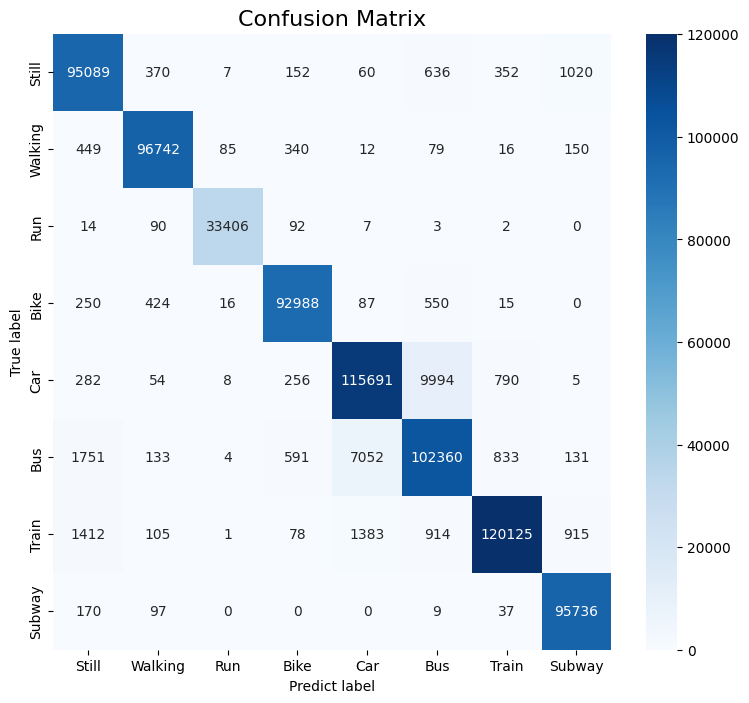

In [24]:
evaluate(y_test, model_XGB1.predict(X_test).tolist())

In [26]:
#模型保存
pickle.dump(model_XGB1, open("/home/dengjiebi/SHL2023/model/2023_6_27_model1", "wb"))
 
# load model from file 模型加载
#loaded_model = pickle.load(open("/home/dengjiebi/SHL2023/model/2023_6_27_model1", "rb"))

### 我是废物😭😭

#### Decision Tree Classifier

Macro F1 Score: 0.9971575469362908

              precision    recall  f1-score   support

       Still       1.00      1.00      1.00     97686
     Walking       1.00      1.00      1.00     97873
         Run       1.00      1.00      1.00     33614
        Bike       1.00      1.00      1.00     94330
         Car       1.00      1.00      1.00    127080
         Bus       1.00      1.00      1.00    112855
       Train       1.00      1.00      1.00    124933
      Subway       1.00      1.00      1.00     96049

    accuracy                           1.00    784420
   macro avg       1.00      1.00      1.00    784420
weighted avg       1.00      1.00      1.00    784420

[[ 97299     96      7     46     28    102     64     44]
 [    96  97530     32     74     19     51     28     43]
 [     3     39  33530     25      9      5      3      0]
 [    53     91     12  94079     25     58     12      0]
 [    20     19      6     23 126708    224     80      0]
 [    78     55   

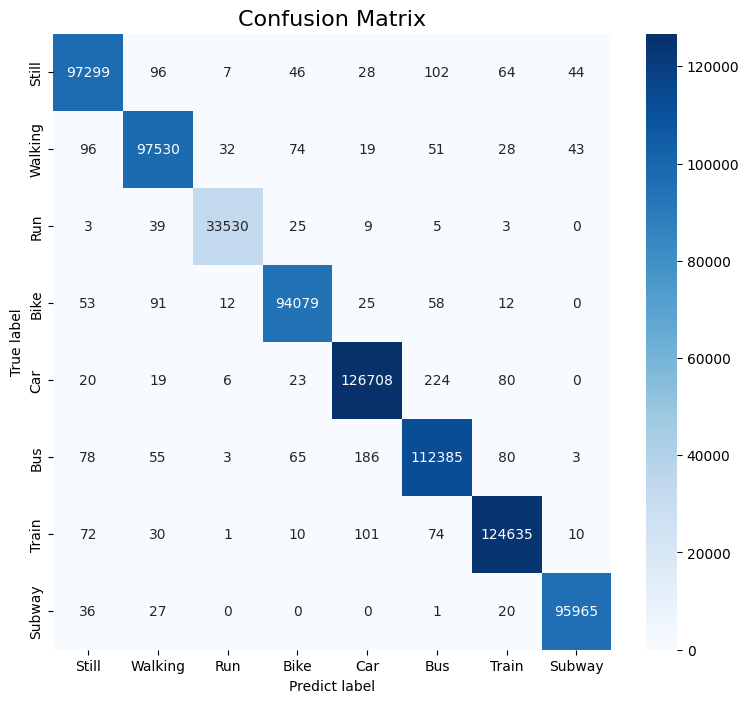

In [16]:
clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)
evaluate(y_test, clf.predict(X_test).tolist())

#### Random Forest Classifier

Macro F1 Score: 0.9996779273877057

              precision    recall  f1-score   support

       Still       1.00      1.00      1.00     97686
     Walking       1.00      1.00      1.00     97873
         Run       1.00      1.00      1.00     33614
        Bike       1.00      1.00      1.00     94330
         Car       1.00      1.00      1.00    127080
         Bus       1.00      1.00      1.00    112855
       Train       1.00      1.00      1.00    124933
      Subway       1.00      1.00      1.00     96049

    accuracy                           1.00    784420
   macro avg       1.00      1.00      1.00    784420
weighted avg       1.00      1.00      1.00    784420

[[ 97618     20      3     10      2      9     10     14]
 [     9  97826      9      8      0      6      6      9]
 [     1      6  33600      5      2      0      0      0]
 [     7     10      2  94310      0      0      1      0]
 [     1      5      1      2 127071      0      0      0]
 [     9     11   

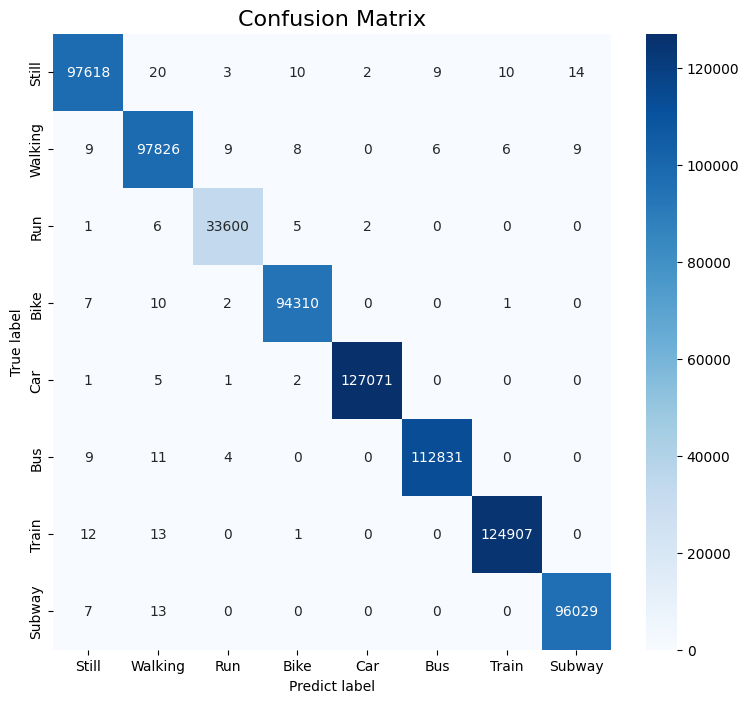

In [17]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
evaluate(y_test, rf.predict(X_test).tolist())

#### Light GBM

Macro F1 Score: 0.996398458121289

              precision    recall  f1-score   support

       Still       0.99      0.99      0.99     97686
     Walking       1.00      1.00      1.00     97873
         Run       1.00      1.00      1.00     33614
        Bike       1.00      1.00      1.00     94330
         Car       1.00      0.99      0.99    127080
         Bus       0.99      0.99      0.99    112855
       Train       1.00      1.00      1.00    124933
      Subway       1.00      1.00      1.00     96049

    accuracy                           1.00    784420
   macro avg       1.00      1.00      1.00    784420
weighted avg       1.00      1.00      1.00    784420

[[ 97166    107      2     57     12    131    116     95]
 [    94  97626     11     41      5     44     18     34]
 [     3      9  33591      8      3      0      0      0]
 [    62     54      4  94145     16     42      7      0]
 [    49     27      0     30 126115    832     27      0]
 [   292     55    

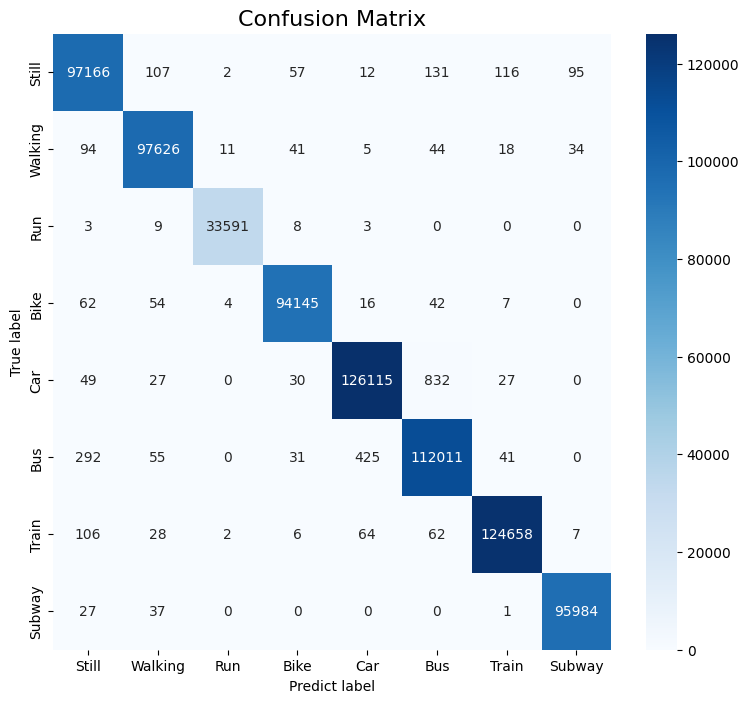

In [18]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
evaluate(y_test, lgbm.predict(X_test).tolist())

## 第二个实验

### 主模型

第二个实验是将原训练集和原验证集作为训练集和测试集。

In [27]:
model_XGB2 = xgb.XGBClassifier(learning_rate=0.01,
                                n_estimators=200,
                                gpu_id=0,
                                max_depth=8,
                                min_child_weight=1,
                                gamma=0,
                                colsample_bytree=0.85,
                                tree_method='gpu_hist')

In [28]:
model_XGB2.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Macro F1 Score: 0.7894520229010406

              precision    recall  f1-score   support

       Still       0.78      0.95      0.86    119364
     Walking       0.90      0.91      0.90    104592
         Run       0.99      0.52      0.68     11100
        Bike       0.94      0.75      0.83     48116
         Car       0.78      0.80      0.79     81896
         Bus       0.77      0.67      0.72     36708
       Train       0.71      0.79      0.75     87240
      Subway       0.89      0.71      0.79     86824

    accuracy                           0.82    575840
   macro avg       0.85      0.76      0.79    575840
weighted avg       0.83      0.82      0.81    575840

[[112905   1718      0    132    429    610   2501   1069]
 [  7159  94834     39    992    389    211    445    523]
 [     1   5072   5720    259      0     45      3      0]
 [  1411   3144      0  35925   5267   2266    103      0]
 [  2499    332      0    255  65595   3844   9371      0]
 [   677     45   

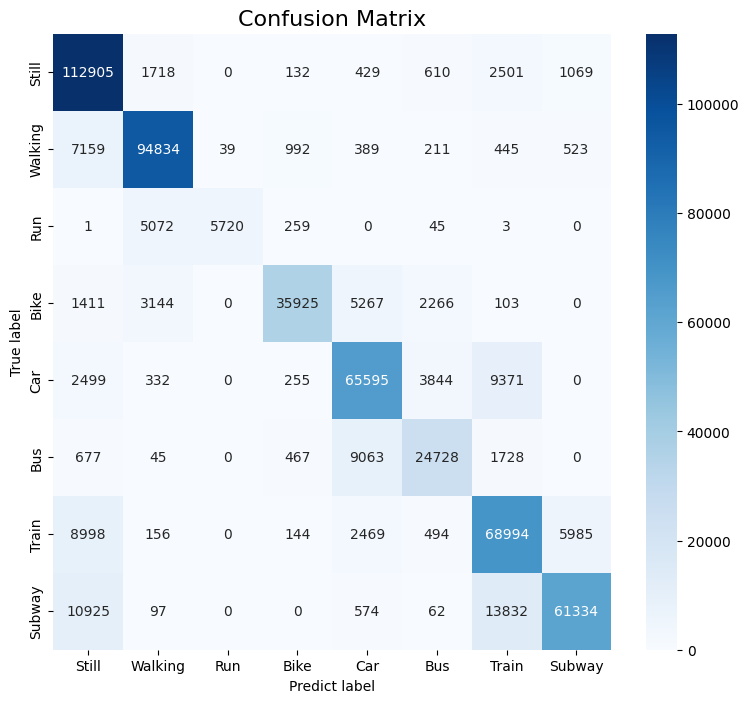

In [29]:
evaluate(y_val, model_XGB2.predict(X_val).tolist())

In [30]:
#模型保存
pickle.dump(model_XGB1, open("/home/dengjiebi/SHL2023/model/2023_6_27_model2", "wb"))

### 我是废物😅😅

#### Decision Tree Classifier

Macro F1 Score: 0.6894481745951415

              precision    recall  f1-score   support

       Still       0.76      0.78      0.77    119364
     Walking       0.83      0.81      0.82    104592
         Run       0.90      0.53      0.67     11100
        Bike       0.77      0.60      0.68     48116
         Car       0.69      0.66      0.67     81896
         Bus       0.42      0.53      0.47     36708
       Train       0.60      0.78      0.68     87240
      Subway       0.86      0.68      0.76     86824

    accuracy                           0.72    575840
   macro avg       0.73      0.67      0.69    575840
weighted avg       0.74      0.72      0.72    575840

[[93427  3128     1   667  1965  6622  9491  4063]
 [ 7518 85121   351  5641   860  2406  1779   916]
 [  120  4152  5870   918     1    35     0     4]
 [ 3510  4999   102 29054  4240  5102  1088    21]
 [ 1737   728   156   607 53672 10310 14679     7]
 [  954   162     2   881  9798 19624  5287     0]
 [ 7109

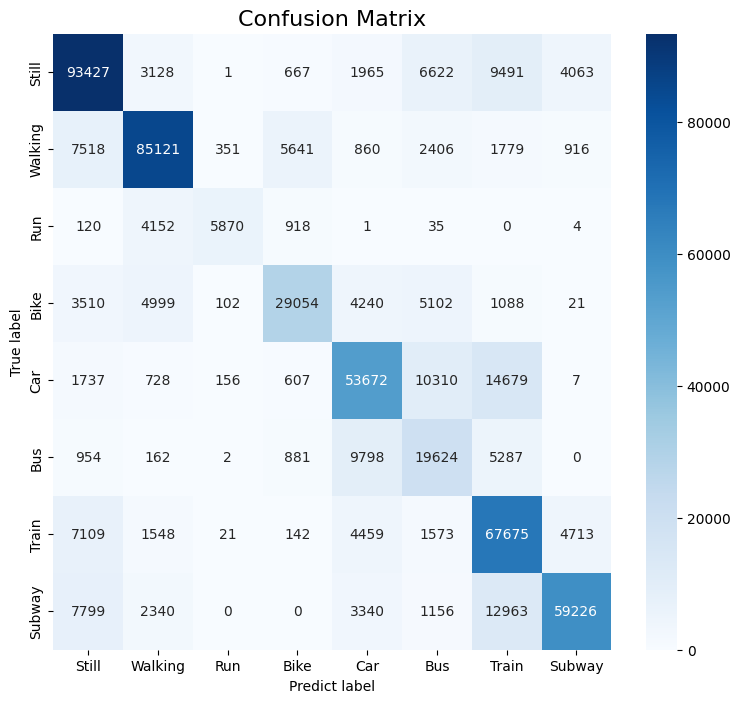

In [19]:
clf2=DecisionTreeClassifier()
clf2.fit(X, y)
evaluate(y_val, clf2.predict(X_val).tolist())

#### Random Foreset Classifier

Macro F1 Score: 0.7938202801802172

              precision    recall  f1-score   support

       Still       0.79      0.93      0.86    119364
     Walking       0.91      0.91      0.91    104592
         Run       1.00      0.50      0.66     11100
        Bike       0.95      0.81      0.87     48116
         Car       0.81      0.77      0.79     81896
         Bus       0.74      0.68      0.71     36708
       Train       0.71      0.82      0.76     87240
      Subway       0.88      0.73      0.80     86824

    accuracy                           0.82    575840
   macro avg       0.85      0.77      0.79    575840
weighted avg       0.83      0.82      0.82    575840

[[111446   1316      0    223    430    888   2798   2263]
 [  7083  94998     14    938    376    256    472    455]
 [     0   5160   5504    436      0      0      0      0]
 [  1353   2029      0  38833   4772   1066     63      0]
 [  2777    420      0    148  62820   5857   9874      0]
 [   420     65   

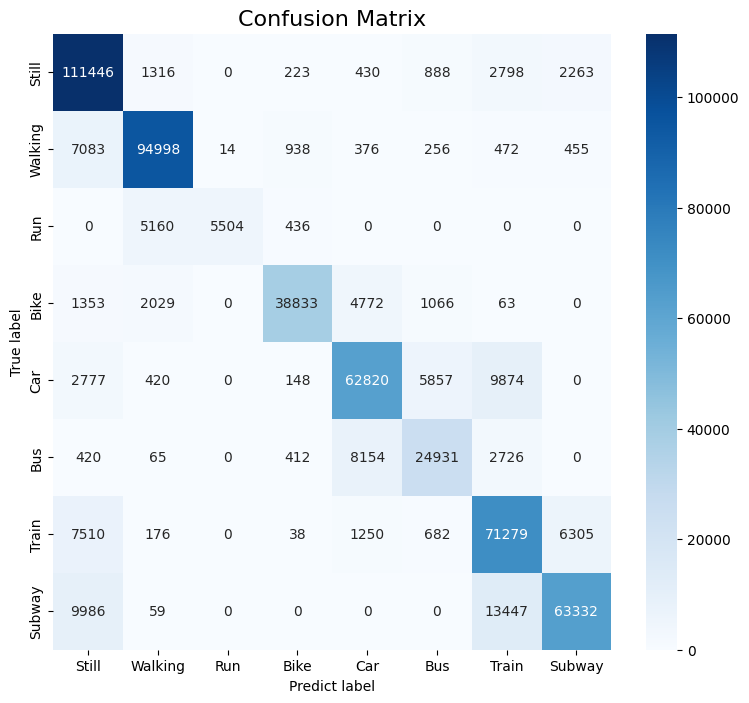

In [20]:
rf2 = RandomForestClassifier(n_jobs=-1)
rf2.fit(X, y)
evaluate(y_val, rf2.predict(X_val).tolist())

#### LightGBM

Macro F1 Score: 0.785749527943048

              precision    recall  f1-score   support

       Still       0.91      0.85      0.88    119364
     Walking       0.90      0.91      0.91    104592
         Run       0.71      0.52      0.60     11100
        Bike       0.96      0.79      0.87     48116
         Car       0.82      0.78      0.80     81896
         Bus       0.76      0.67      0.71     36708
       Train       0.61      0.92      0.73     87240
      Subway       0.90      0.70      0.79     86824

    accuracy                           0.82    575840
   macro avg       0.82      0.77      0.79    575840
weighted avg       0.84      0.82      0.82    575840

[[101712   1919   1912    272    275   1164  10333   1777]
 [  5543  95629    111    636    245    405   1450    573]
 [     0   5146   5797    157      0      0      0      0]
 [  1450   2863      0  37962   4113    999    729      0]
 [  1208    234     22    124  63758   5212  11338      0]
 [   385     70    

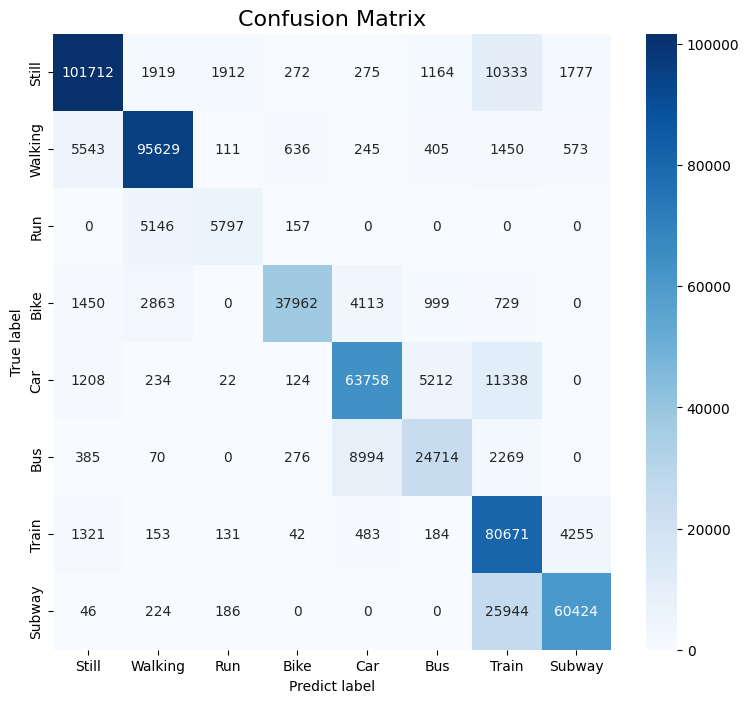

In [21]:
lgbm2 = LGBMClassifier()
lgbm2.fit(X, y)
evaluate(y_val, lgbm2.predict(X_val).tolist())

# 第二项对比：去掉各个数据集后的效果

## 路网数据集

In [17]:
remove_columns=data1_6.columns
remove_columns

Index(['railway_distances', 'living_street_distances', 'busway_distances',
       'motorway_distances', 'residential_distances', 'pedestrian_distances'],
      dtype='object')

In [18]:
X_train_new = X_train.drop(remove_columns,axis=1)
X_val_new = X_val.drop(remove_columns,axis=1)
X_test_new = X_test.drop(remove_columns,axis=1)
X_new = X.drop(remove_columns,axis=1)

In [19]:
model_XGB3 = xgb.XGBClassifier(learning_rate=0.01,
                                n_estimators=200,
                                gpu_id=0,
                                max_depth=8,
                                min_child_weight=1,
                                gamma=0,
                                colsample_bytree=0.85,
                                tree_method='gpu_hist')

In [20]:
model_XGB3.fit(X_train_new, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Macro F1 Score: 0.9432139575790743

              precision    recall  f1-score   support

       Still       0.94      0.97      0.96     97686
     Walking       0.99      0.99      0.99     97873
         Run       1.00      0.99      0.99     33614
        Bike       0.98      0.99      0.98     94330
         Car       0.92      0.90      0.91    127080
         Bus       0.86      0.89      0.88    112855
       Train       0.93      0.92      0.92    124933
      Subway       0.93      0.89      0.91     96049

    accuracy                           0.94    784420
   macro avg       0.94      0.94      0.94    784420
weighted avg       0.94      0.94      0.94    784420

[[ 95227    410      9    183     63    862    279    653]
 [   526  96651     85    335     11     83     13    169]
 [    19     95  33392     97      5      6      0      0]
 [   282    465     34  92973     86    474      7      9]
 [   304     67     10    202 113786  11866    369    476]
 [  2093    147   

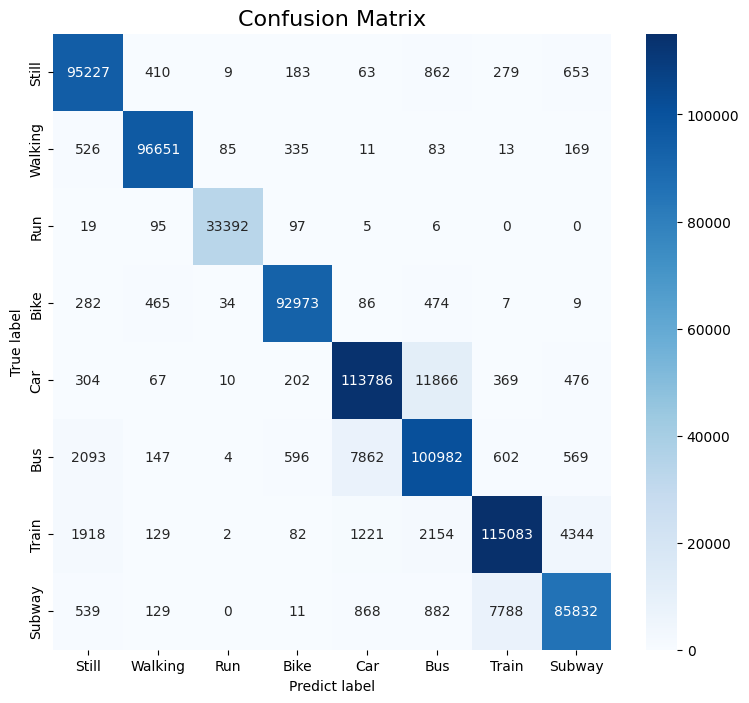

In [22]:
evaluate(y_test, model_XGB3.predict(X_test_new).tolist())

Macro F1 Score: 0.7789465568201328

              precision    recall  f1-score   support

       Still       0.80      0.95      0.87    119364
     Walking       0.90      0.91      0.90    104592
         Run       0.99      0.51      0.68     11100
        Bike       0.94      0.73      0.82     48116
         Car       0.87      0.69      0.77     81896
         Bus       0.54      0.75      0.63     36708
       Train       0.79      0.74      0.76     87240
      Subway       0.79      0.81      0.80     86824

    accuracy                           0.81    575840
   macro avg       0.83      0.76      0.78    575840
weighted avg       0.82      0.81      0.81    575840

[[113392   1761      0    138    301   1150   1478   1144]
 [  7034  94711     41    989     94    523    301    899]
 [    17   5159   5708    213      3      0      0      0]
 [  1348   3063      0  35171   1231   6272     52    979]
 [  2407    241      0    184  56711  12952   6484   2917]
 [   843     49   

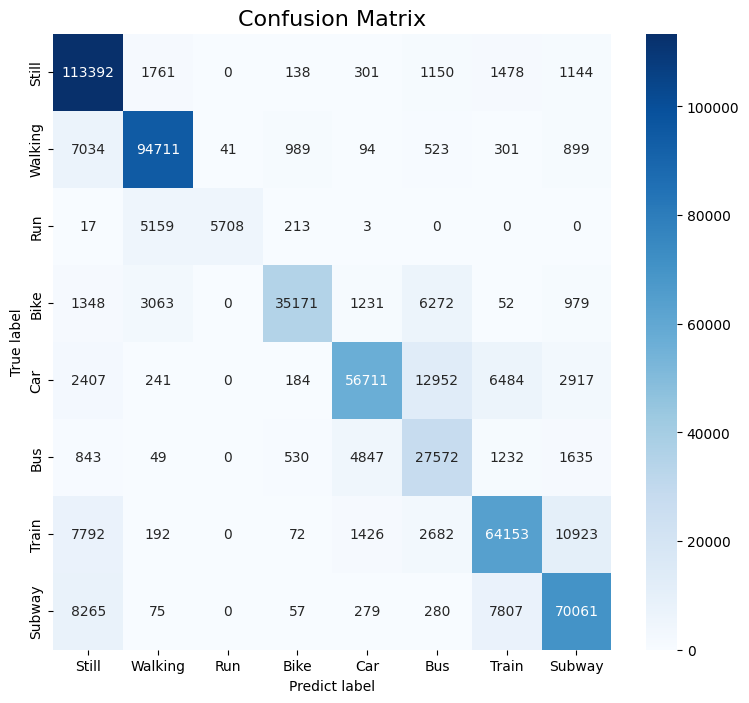

In [23]:
model_XGB4 = xgb.XGBClassifier(learning_rate=0.01,
                                n_estimators=200,
                                gpu_id=0,
                                max_depth=8,
                                min_child_weight=1,
                                gamma=0,
                                colsample_bytree=0.85,
                                tree_method='gpu_hist')

model_XGB4.fit(X_new, y)

evaluate(y_val, model_XGB4.predict(X_val_new).tolist())

# 第三项对比：特定部位的训练数据与验证数据

## 全数据模型与特定部位验证集

In [24]:
model_XGB2=pickle.load(open("/home/dengjiebi/SHL2023/model/2023_6_27_model2", "rb"))

In [27]:
X1_val

,acc_Acc_x,acc_Acc_y,acc_Acc_z,acc_L2,Mean_acc_Acc_x,Mean_acc_Acc_y,Mean_acc_Acc_z,Mean_acc_L2,Var_acc_Acc_x,Var_acc_Acc_y,...,vertical_speed_psd_value3,vertical_speed_psd_index1,vertical_speed_psd_index2,vertical_speed_psd_index3,railway_distances,living_street_distances,busway_distances,motorway_distances,residential_distances,pedestrian_distances
0,8.233006,1.399070,-0.712268,8.381355,10.853302,2.505543,-0.374201,13.246590,107.930923,41.809493,...,0.000094,4.0,0.0,8.0,83545.640,84443.931,115866.758,96481.149,82487.942,84354.745
1,9.530093,1.326214,-2.746821,10.006325,10.755901,2.535315,-0.470311,13.115583,104.627318,40.443321,...,0.000094,4.0,0.0,8.0,83543.798,84442.196,115864.967,96479.135,82486.135,84352.941
2,6.964802,0.956738,-1.583169,7.206264,10.602799,2.468546,-0.676898,12.993155,102.002327,39.281355,...,0.000094,4.0,0.0,8.0,83542.189,84440.669,115863.396,96477.403,82484.553,84351.359
3,9.177164,2.414216,-1.188278,9.563513,10.392398,2.522136,-0.723185,12.781755,100.275627,38.148583,...,0.000094,4.0,0.0,8.0,83540.933,84439.452,115862.157,96476.104,82483.308,84350.116
4,9.067113,0.996756,-3.465133,9.757726,10.304050,2.592136,-0.974922,12.783372,97.502355,37.159164,...,0.000094,4.0,0.0,8.0,83539.251,84437.840,115860.508,96474.331,82481.649,84348.458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143955,-1.462989,6.691926,6.713342,9.591203,-1.463555,6.733055,6.709245,9.617695,0.001628,0.004130,...,0.000004,4.0,16.0,0.0,82191.758,95294.709,110622.373,82807.538,83837.192,89317.512
143956,-1.477083,6.636727,6.754463,9.583877,-1.463720,6.732160,6.711029,9.618347,0.001677,0.004226,...,0.000004,4.0,16.0,0.0,82191.045,95294.070,110621.738,82806.832,83836.491,89316.842
143957,-1.472568,6.619833,6.775859,9.586601,-1.464766,6.731348,6.713708,9.619811,0.001691,0.004335,...,0.000004,4.0,16.0,0.0,82190.433,95293.517,110621.189,82806.225,83835.889,89316.266
143958,-1.472563,6.649087,6.737025,9.579473,-1.465050,6.730115,6.715744,9.620420,0.001742,0.004423,...,0.000004,4.0,16.0,0.0,82189.850,95292.989,110620.664,82805.645,83835.314,89315.715


In [31]:
X_val

,acc_Acc_x,acc_Acc_y,acc_Acc_z,acc_L2,Mean_acc_Acc_x,Mean_acc_Acc_y,Mean_acc_Acc_z,Mean_acc_L2,Var_acc_Acc_x,Var_acc_Acc_y,...,vertical_speed_psd_value3,vertical_speed_psd_index1,vertical_speed_psd_index2,vertical_speed_psd_index3,railway_distances,living_street_distances,busway_distances,motorway_distances,residential_distances,pedestrian_distances
0,8.233006,1.399070,-0.712268,8.381355,10.853302,2.505543,-0.374201,13.246590,107.930923,41.809493,...,0.000094,4.0,0.0,8.0,83545.640,84443.931,115866.758,96481.149,82487.942,84354.745
1,9.530093,1.326214,-2.746821,10.006325,10.755901,2.535315,-0.470311,13.115583,104.627318,40.443321,...,0.000094,4.0,0.0,8.0,83543.798,84442.196,115864.967,96479.135,82486.135,84352.941
2,6.964802,0.956738,-1.583169,7.206264,10.602799,2.468546,-0.676898,12.993155,102.002327,39.281355,...,0.000094,4.0,0.0,8.0,83542.189,84440.669,115863.396,96477.403,82484.553,84351.359
3,9.177164,2.414216,-1.188278,9.563513,10.392398,2.522136,-0.723185,12.781755,100.275627,38.148583,...,0.000094,4.0,0.0,8.0,83540.933,84439.452,115862.157,96476.104,82483.308,84350.116
4,9.067113,0.996756,-3.465133,9.757726,10.304050,2.592136,-0.974922,12.783372,97.502355,37.159164,...,0.000094,4.0,0.0,8.0,83539.251,84437.840,115860.508,96474.331,82481.649,84348.458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143955,-3.464258,1.840353,9.395317,10.181354,-3.234359,1.787823,9.089762,9.814301,0.018563,0.021534,...,0.000005,4.0,16.0,0.0,82188.124,95292.762,110620.521,82804.047,83833.843,89314.901
143956,-3.174469,1.264574,9.280361,9.889464,-3.237663,1.789276,9.091431,9.817247,0.018732,0.022110,...,0.000005,4.0,16.0,0.0,82191.119,95295.761,110623.519,82807.044,83836.842,89317.904
143957,-2.935468,1.468596,9.301156,9.863329,-3.240195,1.785846,9.091876,9.817901,0.019092,0.022389,...,0.000005,4.0,16.0,0.0,82191.336,95295.950,110623.706,82807.259,83837.055,89318.104
143958,-2.940376,1.462132,9.132265,9.704736,-3.241428,1.785390,9.094614,9.820824,0.019656,0.023104,...,0.000005,4.0,16.0,0.0,82194.974,95299.245,110626.980,82810.870,83840.638,89321.539


Macro F1 Score: 0.8058792021374422

              precision    recall  f1-score   support

       Still       0.87      0.96      0.92     29841
     Walking       0.91      0.89      0.90     26148
         Run       0.98      0.42      0.59      2775
        Bike       0.96      0.63      0.76     12029
         Car       0.77      0.89      0.82     20474
         Bus       0.72      0.64      0.68      9177
       Train       0.85      0.91      0.88     21810
      Subway       0.92      0.88      0.90     21706

    accuracy                           0.86    143960
   macro avg       0.87      0.78      0.81    143960
weighted avg       0.87      0.86      0.86    143960

[[28784    97     0     0   318    58   277   307]
 [ 2146 23352    28   200   107   151    21   143]
 [    8  1490  1168    64     0    45     0     0]
 [  390   772     0  7600  1919  1348     0     0]
 [ 1197     1     0     0 18174   598   504     0]
 [   97     8     0    59  2978  5909   126     0]
 [  300

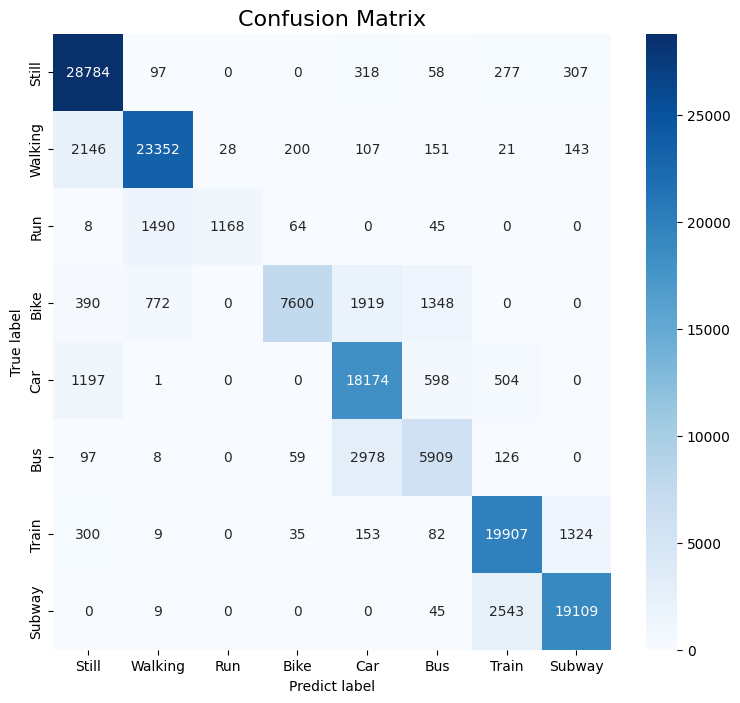

In [33]:
y1_val = le.fit_transform(y1_val)
evaluate(y1_val, model_XGB2.predict(X1_val).tolist())

Macro F1 Score: 0.8553913277309859

              precision    recall  f1-score   support

       Still       0.89      0.96      0.93     29841
     Walking       0.92      0.92      0.92     26148
         Run       1.00      0.64      0.78      2775
        Bike       0.93      0.92      0.92     12029
         Car       0.80      0.81      0.81     20474
         Bus       0.78      0.64      0.71      9177
       Train       0.87      0.80      0.84     21810
      Subway       0.91      0.99      0.94     21706

    accuracy                           0.88    143960
   macro avg       0.89      0.84      0.86    143960
weighted avg       0.88      0.88      0.88    143960

[[28605   441     0    10    14   197   317   257]
 [ 1647 24108     0   224     0    24    23   122]
 [    0   915  1779    81     0     0     0     0]
 [  304   459     0 11102     0   164     0     0]
 [  568   264     0   271 16589   962  1820     0]
 [  225     1     0   247  2670  5917   117     0]
 [  641

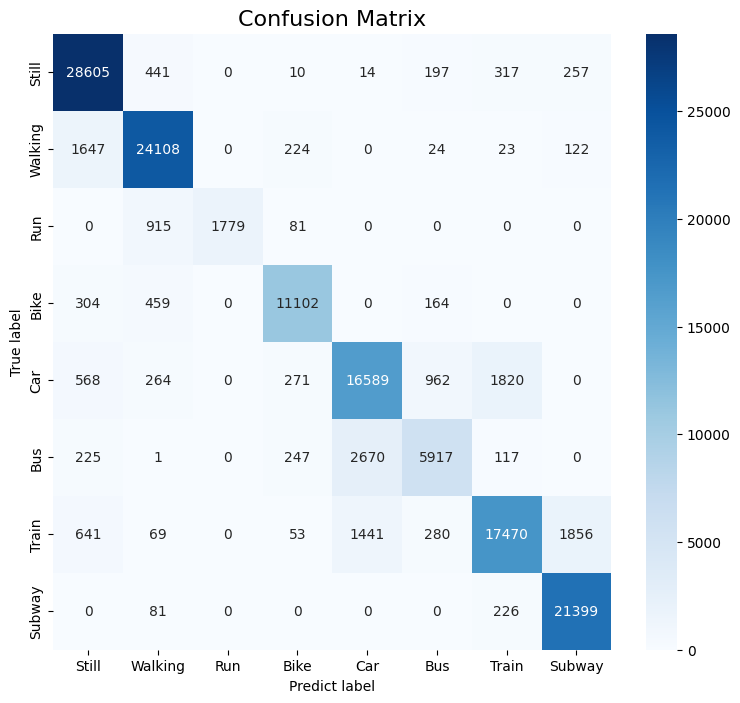

In [34]:
y2_val = le.fit_transform(y2_val)
evaluate(y2_val, model_XGB2.predict(X2_val).tolist())

Macro F1 Score: 0.730386075999852

              precision    recall  f1-score   support

       Still       0.56      0.93      0.70     29841
     Walking       0.86      0.90      0.88     26148
         Run       1.00      0.53      0.69      2775
        Bike       0.93      0.83      0.88     12029
         Car       0.84      0.68      0.75     20474
         Bus       0.79      0.69      0.74      9177
       Train       0.64      0.55      0.59     21810
      Subway       0.85      0.47      0.61     21706

    accuracy                           0.73    143960
   macro avg       0.81      0.70      0.73    143960
weighted avg       0.77      0.73      0.73    143960

[[27723  1043     0   121    71    89   613   181]
 [ 1841 23616     0   344   111    15    66   155]
 [    0  1182  1471   122     0     0     0     0]
 [  331  1385     0  9956    71   280     6     0]
 [  250     6     0     0 13944  1118  5156     0]
 [  145    17     0    93  2158  6322   442     0]
 [ 7868 

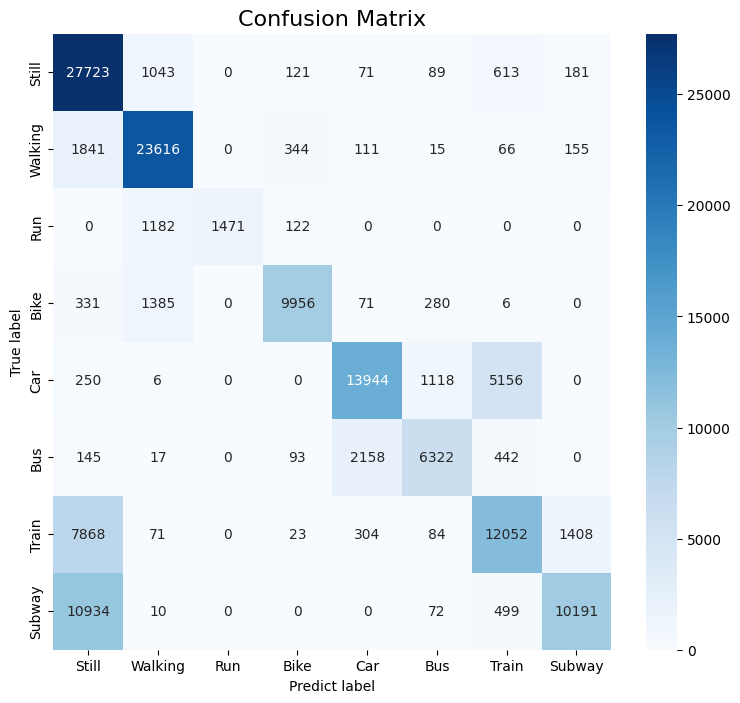

In [35]:
y3_val = le.fit_transform(y3_val)
evaluate(y3_val, model_XGB2.predict(X3_val).tolist())

Macro F1 Score: 0.7518191435367862

              precision    recall  f1-score   support

       Still       0.91      0.93      0.92     29841
     Walking       0.92      0.90      0.91     26148
         Run       1.00      0.47      0.64      2775
        Bike       0.97      0.63      0.76     12029
         Car       0.74      0.82      0.78     20474
         Bus       0.75      0.69      0.72      9177
       Train       0.55      0.89      0.68     21810
      Subway       0.85      0.47      0.60     21706

    accuracy                           0.79    143960
   macro avg       0.83      0.73      0.75    143960
weighted avg       0.82      0.79      0.78    143960

[[27873   115     0     0    29   235  1250   339]
 [ 1712 23628     2   168   168    42   324   104]
 [    0  1459  1308     6     0     0     2     0]
 [  387   427     0  7519  3211   433    52     0]
 [  364    55     0     0 16875  1321  1859     0]
 [  208    19     0    63  1451  6338  1098     0]
 [  141

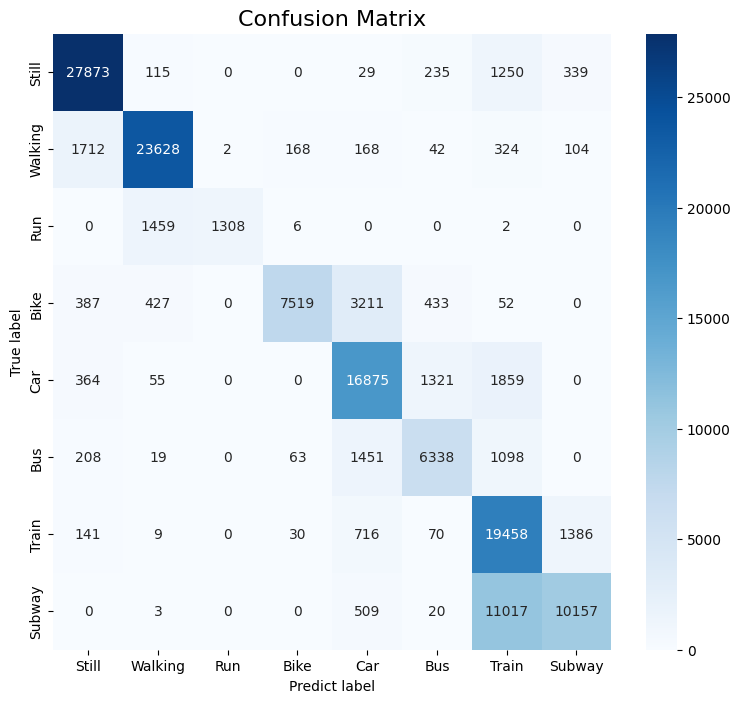

In [36]:
y4_val = le.fit_transform(y4_val)
evaluate(y4_val, model_XGB2.predict(X4_val).tolist())

## 特定部位模型与特定部位验证集

In [38]:
#打乱数据集顺序
X1,y1= shuffle(X1,y1,random_state=648)

In [40]:
y1 = le.fit_transform(y1)

Macro F1 Score: 0.7536982567892243

              precision    recall  f1-score   support

       Still       0.87      0.93      0.90     29841
     Walking       0.91      0.93      0.92     26148
         Run       0.99      0.62      0.76      2775
        Bike       0.91      0.46      0.61     12029
         Car       0.60      0.56      0.58     20474
         Bus       0.57      0.63      0.60      9177
       Train       0.71      0.87      0.78     21810
      Subway       0.89      0.87      0.88     21706

    accuracy                           0.80    143960
   macro avg       0.81      0.73      0.75    143960
weighted avg       0.80      0.80      0.79    143960

[[27677   524     0     1   163   214   731   531]
 [ 1018 24367    18   335   109    98    91   112]
 [    0  1059  1716     0     0     0     0     0]
 [  224   791     0  5534  4612   868     0     0]
 [ 2193    30     0     0 11506  3061  3684     0]
 [  154    12     0   144  2419  5768   680     0]
 [  425

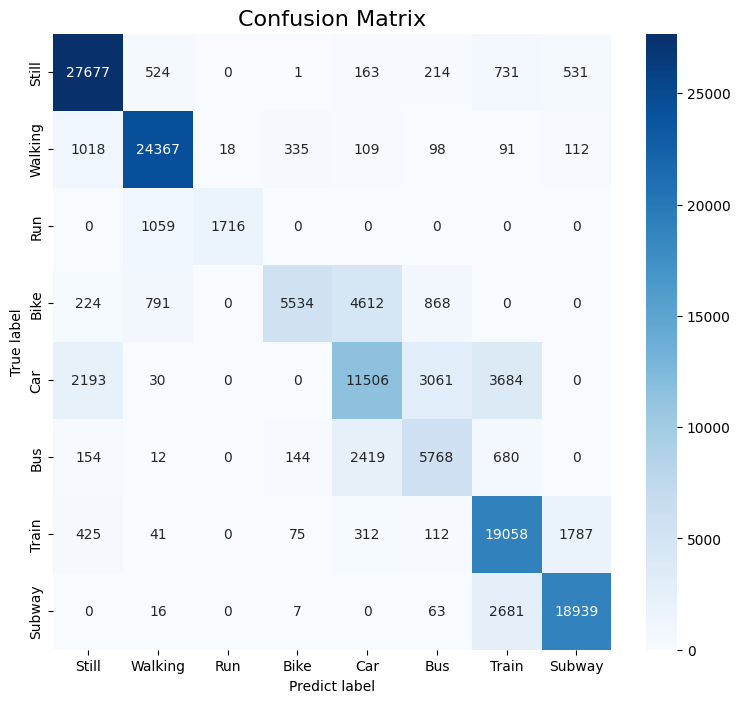

In [42]:
model_XGB_test = xgb.XGBClassifier(learning_rate=0.01,
                                n_estimators=200,
                                gpu_id=0,
                                max_depth=8,
                                min_child_weight=1,
                                gamma=0,
                                colsample_bytree=0.85,
                                tree_method='gpu_hist')

model_XGB_test.fit(X1,y1)

evaluate(y1_val, model_XGB_test.predict(X1_val).tolist())

pickle.dump(model_XGB_test, open("/home/dengjiebi/SHL2023/model/2023_6_27_model_test1", "wb"))

In [43]:
#打乱数据集顺序
X2,y2= shuffle(X2,y2,random_state=648)
y2 = le.fit_transform(y2)

Macro F1 Score: 0.7697496025234629

              precision    recall  f1-score   support

       Still       0.86      0.94      0.90     29841
     Walking       0.88      0.90      0.89     26148
         Run       1.00      0.69      0.82      2775
        Bike       0.92      0.40      0.56     12029
         Car       0.79      0.61      0.69     20474
         Bus       0.49      0.70      0.58      9177
       Train       0.77      0.83      0.80     21810
      Subway       0.87      0.99      0.93     21706

    accuracy                           0.81    143960
   macro avg       0.82      0.76      0.77    143960
weighted avg       0.83      0.81      0.81    143960

[[28102   294     0     0    23   114   500   808]
 [ 2059 23587     0   240     0    71    19   172]
 [    0   741  1919   115     0     0     0     0]
 [ 1070  2068     0  4858   805  3078   150     0]
 [  549   185     0    17 12533  3098  4092     0]
 [  208     9     0    23  2080  6457   400     0]
 [  526

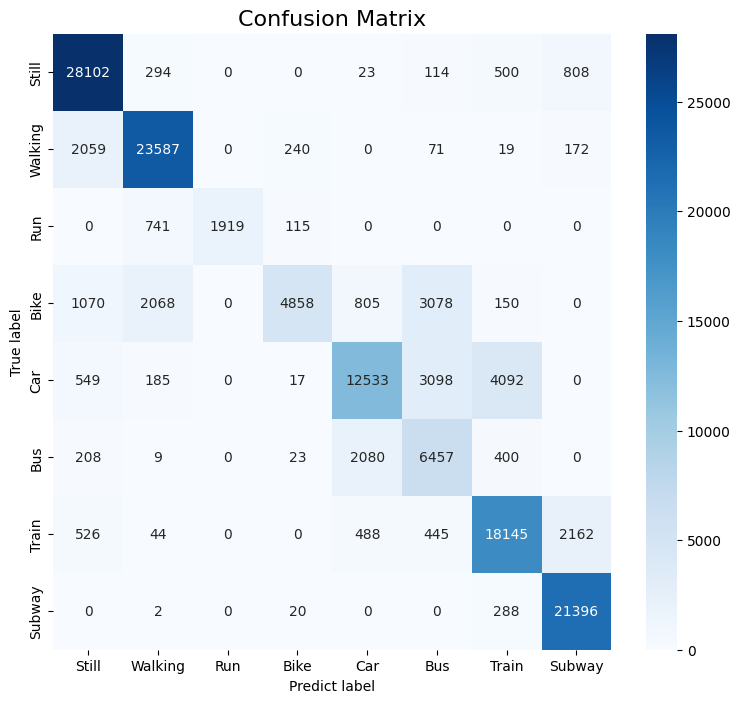

In [44]:
model_XGB_test = xgb.XGBClassifier(learning_rate=0.01,
                                n_estimators=200,
                                gpu_id=0,
                                max_depth=8,
                                min_child_weight=1,
                                gamma=0,
                                colsample_bytree=0.85,
                                tree_method='gpu_hist')

model_XGB_test.fit(X2,y2)

evaluate(y2_val, model_XGB_test.predict(X2_val).tolist())

pickle.dump(model_XGB_test, open("/home/dengjiebi/SHL2023/model/2023_6_27_model_test2", "wb"))

In [45]:
#打乱数据集顺序
X3,y3= shuffle(X3,y3,random_state=648)
y3 = le.fit_transform(y3)

Macro F1 Score: 0.6933805959683402

              precision    recall  f1-score   support

       Still       0.56      0.91      0.69     29841
     Walking       0.92      0.85      0.88     26148
         Run       1.00      0.40      0.57      2775
        Bike       0.82      0.95      0.88     12029
         Car       0.76      0.75      0.75     20474
         Bus       0.65      0.52      0.58      9177
       Train       0.69      0.50      0.58     21810
      Subway       0.83      0.48      0.61     21706

    accuracy                           0.72    143960
   macro avg       0.78      0.67      0.69    143960
weighted avg       0.75      0.72      0.71    143960

[[27223   345     0   477   350   738   541   167]
 [ 2156 22214     0  1481     0    74    73   150]
 [    0  1334  1111   328     0     2     0     0]
 [  279   201     0 11406     0   143     0     0]
 [  389     5     0     0 15297  1418  3365     0]
 [  107    14     0   183  3668  4775   430     0]
 [ 7885

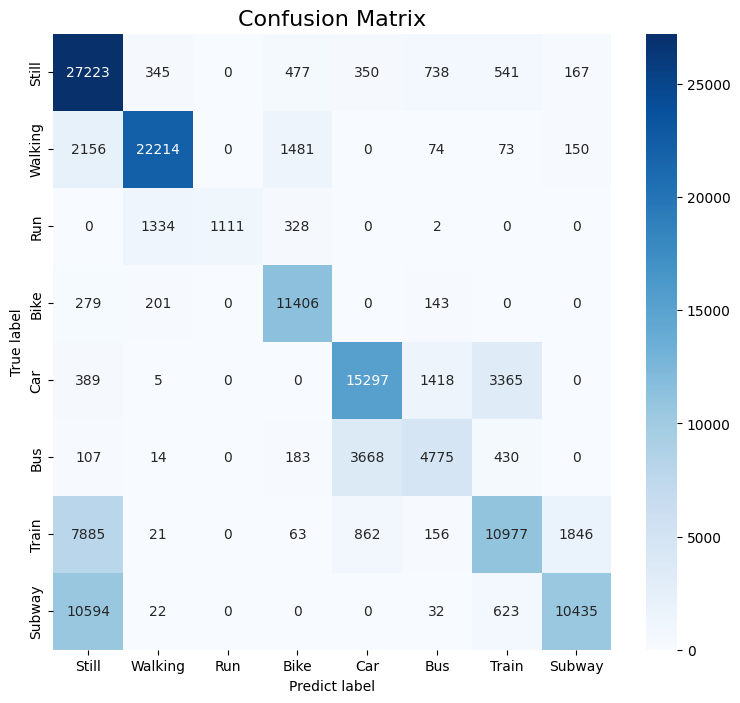

In [46]:
model_XGB_test = xgb.XGBClassifier(learning_rate=0.01,
                                n_estimators=200,
                                gpu_id=0,
                                max_depth=8,
                                min_child_weight=1,
                                gamma=0,
                                colsample_bytree=0.85,
                                tree_method='gpu_hist')

model_XGB_test.fit(X3,y3)

evaluate(y3_val, model_XGB_test.predict(X3_val).tolist())

pickle.dump(model_XGB_test, open("/home/dengjiebi/SHL2023/model/2023_6_27_model_test3", "wb"))

In [47]:
#打乱数据集顺序
X4,y4= shuffle(X4,y4,random_state=648)
y4 = le.fit_transform(y4)

Macro F1 Score: 0.7055442408566522

              precision    recall  f1-score   support

       Still       0.90      0.89      0.89     29841
     Walking       0.89      0.90      0.89     26148
         Run       1.00      0.25      0.40      2775
        Bike       0.87      0.69      0.77     12029
         Car       0.83      0.81      0.82     20474
         Bus       0.68      0.57      0.62      9177
       Train       0.52      0.90      0.66     21810
      Subway       0.82      0.46      0.59     21706

    accuracy                           0.77    143960
   macro avg       0.81      0.68      0.71    143960
weighted avg       0.80      0.77      0.76    143960

[[26450   209     0     5     8   416  2161   592]
 [ 1621 23442     0   389   193    69   297   137]
 [    0  1345   690   740     0     0     0     0]
 [  312  1316     0  8301  2010    70    20     0]
 [  500    39     0     8 16640  1941  1346     0]
 [  226     4     0   106   581  5234  3026     0]
 [   85

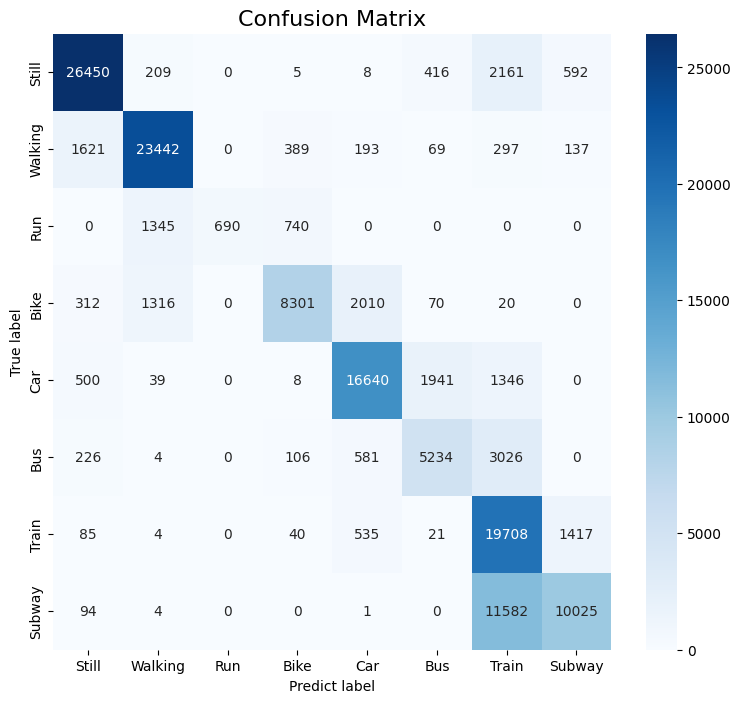

In [48]:
model_XGB_test = xgb.XGBClassifier(learning_rate=0.01,
                                n_estimators=200,
                                gpu_id=0,
                                max_depth=8,
                                min_child_weight=1,
                                gamma=0,
                                colsample_bytree=0.85,
                                tree_method='gpu_hist')

model_XGB_test.fit(X4,y4)

evaluate(y4_val, model_XGB_test.predict(X4_val).tolist())

pickle.dump(model_XGB_test, open("/home/dengjiebi/SHL2023/model/2023_6_27_model_test4", "wb"))

In [55]:
label=pd.read_pickle("/home/ossdata/dengjiebi/data_pkl/train/bag_label_full.pkl")
label

,time,label
0,1490431582760,4
1,1490431582770,4
2,1490431582780,4
3,1490431582790,4
4,1490431582800,4
...,...,...
98052433,1499267852410,5
98052434,1499267852420,5
98052435,1499267852430,5
98052436,1499267852440,5
